## Import Needed Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# processing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

## Load Dataset and take quick look

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Visualize data

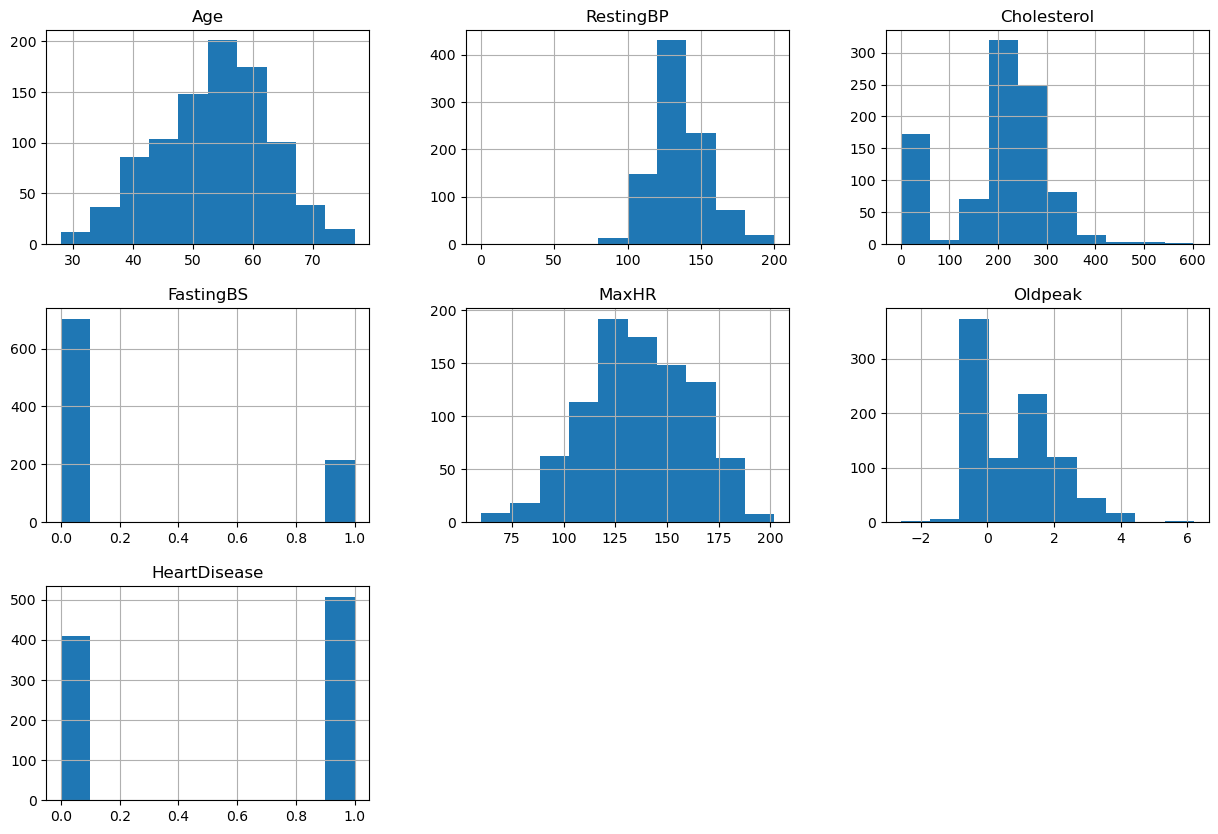

In [5]:
df.hist(figsize=(15, 10))
plt.show()

In [6]:
corr = df.corr()
corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


Text(0.5, 1.0, 'Relation between features and Heart_Failure')

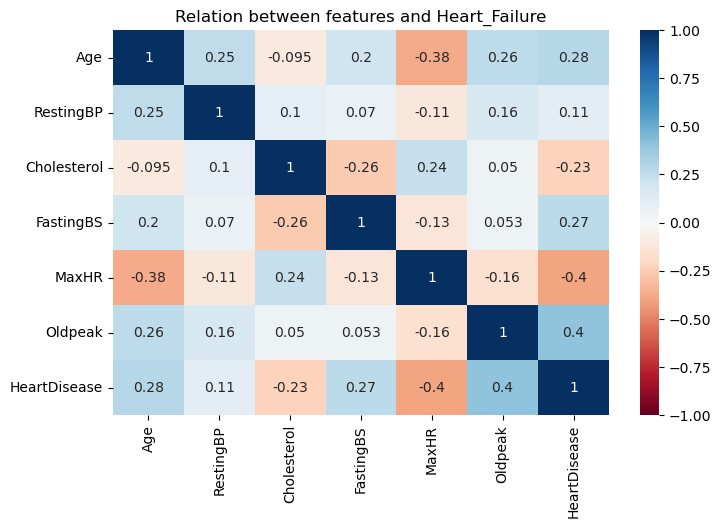

In [7]:
plt.figure(figsize=(8,5))
sns.heatmap(corr, cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Relation between features and Heart_Failure')

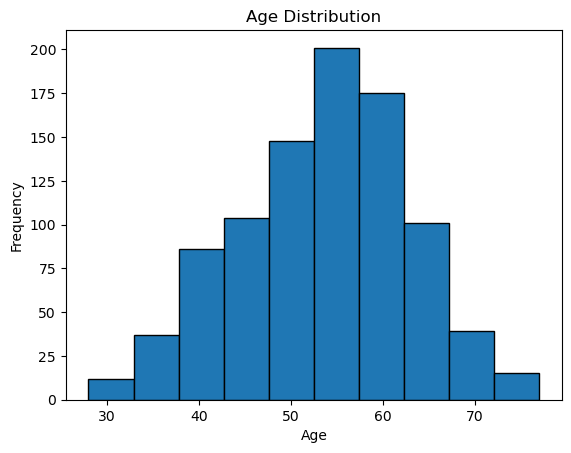

In [8]:
plt.hist(df['Age'], edgecolor='k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

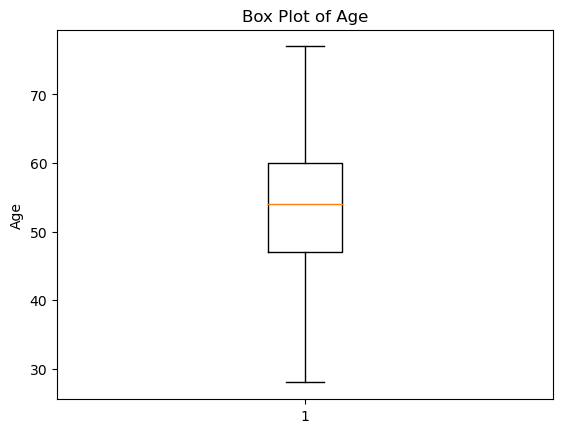

In [9]:
plt.boxplot(df['Age'])
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

## Data Processing

In [10]:
cat_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

In [11]:
# encode categorical values using pandas
df = pd.get_dummies(data=df, prefix=cat_columns, columns=cat_columns)

In [12]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


## Feature Selection

In [13]:
X = df.drop(["HeartDisease"], axis=1)
y = df["HeartDisease"]

In [14]:
X.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

## Split data into train and test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Modeling

### 1-Decision Tree

In [16]:
# try to find best min_samples_splits and max_depth
min_samples_split_list = [2, 5, 10, 20, 30, 40, 50, 70, 100, 150, 200, 250, 300]
max_depth_list  = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 30, None] 

In [17]:
train_accuracy_list = []
test_accuracy_list  = []

for min_samples_split in min_samples_split_list:
    
    model = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=0)
    model.fit(X_train, y_train)
    
    train_predict = model.predict(X_train)
    test_predict  = model.predict(X_test)
    
    train_accuracy = accuracy_score(train_predict, y_train)
    test_accuracy  = accuracy_score(test_predict, y_test)
    
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)

<Figure size 200x500 with 0 Axes>

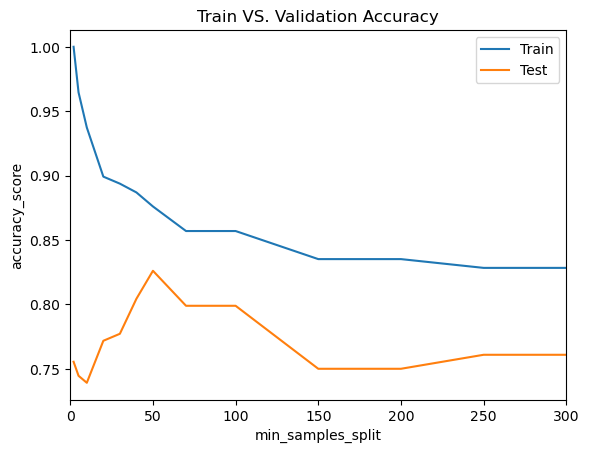

<Figure size 200x500 with 0 Axes>

In [18]:
plt.title("Train VS. Validation Accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("accuracy_score")
plt.xlim(0, 300)
plt.plot(min_samples_split_list, train_accuracy_list)
plt.plot(min_samples_split_list, test_accuracy_list)
plt.legend(['Train', 'Test'])
plt.figure(figsize=(2, 5))

In [19]:
train_accuracy_list = []
test_accuracy_list  = []

for max_depth in max_depth_list:
    
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    model.fit(X_train, y_train)
    
    train_predict = model.predict(X_train)
    test_predict  = model.predict(X_test)
    
    train_accuracy = accuracy_score(train_predict, y_train)
    test_accuracy  = accuracy_score(test_predict, y_test)
    
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)

<Figure size 200x500 with 0 Axes>

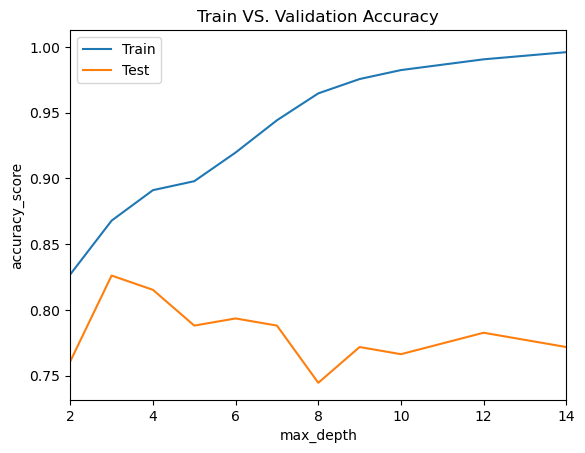

<Figure size 200x500 with 0 Axes>

In [20]:
plt.title("Train VS. Validation Accuracy")
plt.xlabel("max_depth")
plt.ylabel("accuracy_score")
plt.xlim(2, 14)
plt.plot(max_depth_list, train_accuracy_list)
plt.plot(max_depth_list, test_accuracy_list)
plt.legend(['Train', 'Test'])
plt.figure(figsize=(2, 5))

In [21]:
DT_model = DecisionTreeClassifier(min_samples_split=50, max_depth=4, random_state=0)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=50, random_state=0)

In [22]:
print(f'Training Accuracy Score is: {accuracy_score(y_train, DT_model.predict(X_train)):.4f}')
print(f'Test Accuracy Score is: {accuracy_score(y_test, DT_model.predict(X_test)):.4f}')

Training Accuracy Score is: 0.8760
Test Accuracy Score is: 0.8370


In [23]:
print(classification_report(y_test, DT_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        77
           1       0.84      0.89      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



<AxesSubplot:>

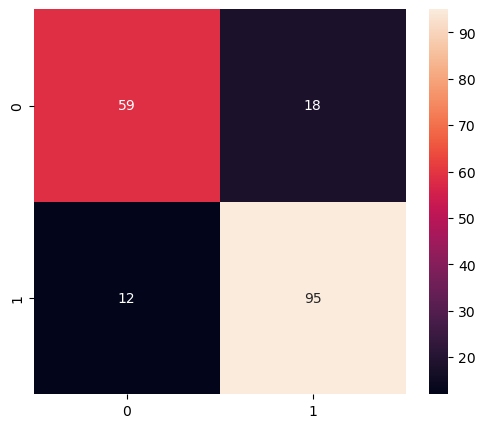

In [24]:
cm = confusion_matrix(y_test, DT_model.predict(X_test))
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d')

### 2-Random Forest

In [25]:
# try to find best min_samples_splits, max_depth, n_estimators
min_samples_split_list = [2, 5, 10, 20, 30, 40, 50, 70, 100, 150, 200, 250, 300]
max_depth_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 30, None] 
n_estimators_list = [10, 20, 30, 50, 70, 100, 150]

In [26]:
rftrain_accuracy_list =[]
rftest_accuracy_list  =[]

for min_samples_split in min_samples_split_list:
    
    RF_model = RandomForestClassifier(min_samples_split=min_samples_split, random_state=0)
    RF_model.fit(X_train, y_train)
    
    rftrain_prediction = RF_model.predict(X_train)
    rftest_prediction  = RF_model.predict(X_test)
    
    rftrain_accuracy = accuracy_score(rftrain_prediction, y_train)
    rftest_accuracy  = accuracy_score(rftest_prediction, y_test)
    
    rftrain_accuracy_list.append(rftrain_accuracy)
    rftest_accuracy_list.append(rftest_accuracy)

<Figure size 200x500 with 0 Axes>

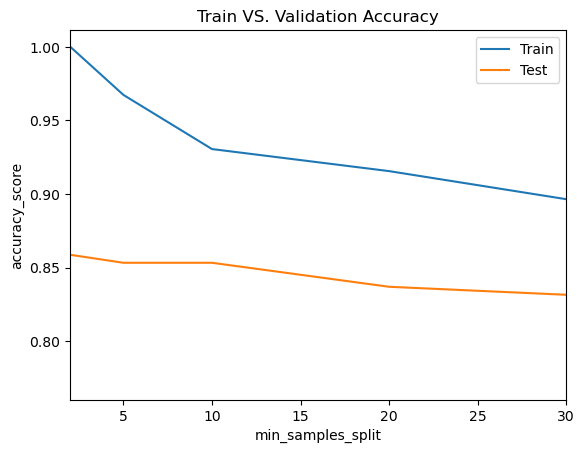

<Figure size 200x500 with 0 Axes>

In [27]:
plt.title("Train VS. Validation Accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("accuracy_score")
plt.xlim(2, 30)
plt.plot(min_samples_split_list, rftrain_accuracy_list)
plt.plot(min_samples_split_list, rftest_accuracy_list)
plt.legend(['Train', 'Test'])
plt.figure(figsize=(2, 5))

In [28]:
rftrain_accuracy_list =[]
rftest_accuracy_list  =[]

for max_depth in max_depth_list:
    
    RF_model = RandomForestClassifier(max_depth=max_depth, random_state=0)
    RF_model.fit(X_train, y_train)
    
    rftrain_prediction = RF_model.predict(X_train)
    rftest_prediction  = RF_model.predict(X_test)
    
    rftrain_accuracy = accuracy_score(rftrain_prediction, y_train)
    rftest_accuracy  = accuracy_score(rftest_prediction, y_test)
    
    rftrain_accuracy_list.append(rftrain_accuracy)
    rftest_accuracy_list.append(rftest_accuracy)

<Figure size 200x500 with 0 Axes>

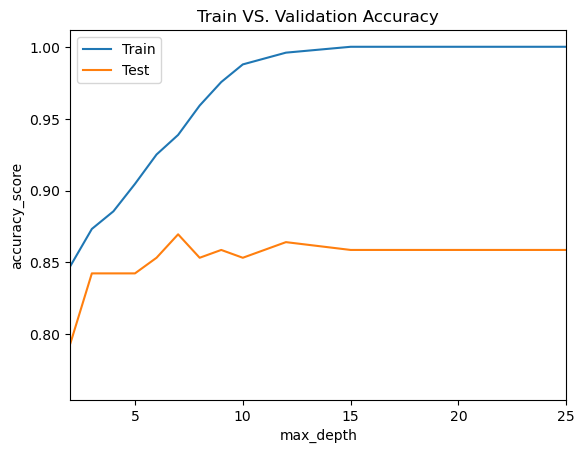

<Figure size 200x500 with 0 Axes>

In [29]:
plt.title("Train VS. Validation Accuracy")
plt.xlabel("max_depth")
plt.ylabel("accuracy_score")
plt.xlim(2, 25)
plt.plot(max_depth_list, rftrain_accuracy_list)
plt.plot(max_depth_list, rftest_accuracy_list)
plt.legend(['Train', 'Test'])
plt.figure(figsize=(2, 5))

In [30]:
rftrain_accuracy_list =[]
rftest_accuracy_list  =[]

for n_estimators in n_estimators_list:
    
    RF_model = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    RF_model.fit(X_train, y_train)
    
    rftrain_prediction = RF_model.predict(X_train)
    rftest_prediction  = RF_model.predict(X_test)
    
    rftrain_accuracy = accuracy_score(rftrain_prediction, y_train)
    rftest_accuracy  = accuracy_score(rftest_prediction, y_test)
    
    rftrain_accuracy_list.append(rftrain_accuracy)
    rftest_accuracy_list.append(rftest_accuracy)

<Figure size 200x500 with 0 Axes>

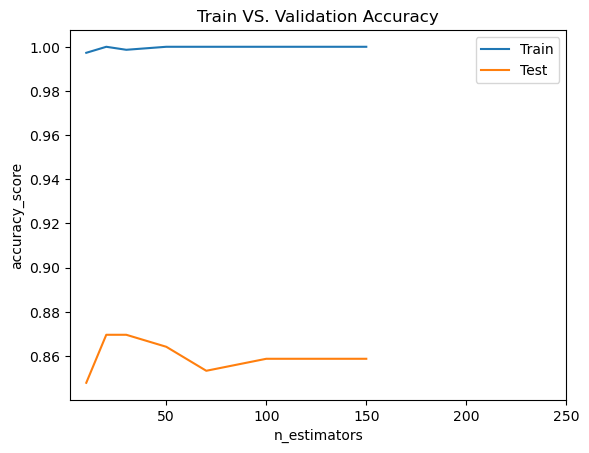

<Figure size 200x500 with 0 Axes>

In [31]:
plt.title("Train VS. Validation Accuracy")
plt.xlabel("n_estimators")
plt.ylabel("accuracy_score")
plt.xlim(2, 250)
plt.plot(n_estimators_list, rftrain_accuracy_list)
plt.plot(n_estimators_list, rftest_accuracy_list)
plt.legend(['Train', 'Test'])
plt.figure(figsize=(2, 5))

In [32]:
RF_model = RandomForestClassifier(min_samples_split=10, max_depth=10, n_estimators=100, random_state=0)
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=0)

In [33]:
print(f'Training Accuracy Score is: {accuracy_score( y_train, RF_model.predict(X_train)):.4f}')
print(f'Test Accuracy Score is: {accuracy_score(y_test, RF_model.predict(X_test)):.4f}')

Training Accuracy Score is: 0.9346
Test Accuracy Score is: 0.8533


In [34]:
print(classification_report(y_test, RF_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.77      0.81        77
           1       0.84      0.92      0.88       107

    accuracy                           0.85       184
   macro avg       0.86      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184



<AxesSubplot:>

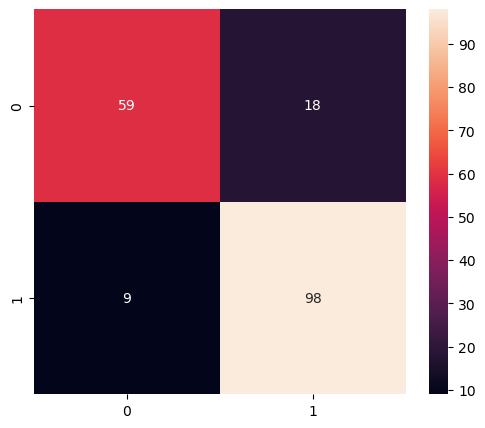

In [35]:
cm = confusion_matrix(y_test, RF_model.predict(X_test))
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d')

## Hyperparameter Tuning


In [36]:
# hyperparameters to search over the above mentioned 
hyperparameters= {
    
    'min_samples_split' : [2, 5, 10, 20, 30, 40, 50, 70, 100, 150, 200, 250, 300],
    'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 30, None], 
    'n_estimators' : [10, 20, 30, 50, 70, 100, 150]
    
}

In [37]:
#  over hyperparameters
randomized_clf = RandomizedSearchCV(estimator=RF_model, param_distributions=hyperparameters, cv=5, random_state=0, n_jobs=-1)

In [38]:
# fit randomized_clf to X_train and y_train
randomized_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=10,
                                                    min_samples_split=10,
                                                    random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 12, 15, 20, 30,
                                                      None],
                                        'min_samples_split': [2, 5, 10, 20, 30,
                                                              40, 50, 70, 100,
                                                              150, 200, 250,
                                                              300],
                                        'n_estimators': [10, 20, 30, 50, 70,
                                                         100, 150]},
                   random_state=0)

In [39]:
# Print the best hyperparameters
randomized_clf.best_params_

{'n_estimators': 150, 'min_samples_split': 5, 'max_depth': 7}

In [40]:

# Print the best Score
randomized_clf.best_score_

0.8787624638896656